In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s3e22:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F59110%2F6536030%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240402%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240402T153733Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D266011dc077199cff5cb12d11f0292494ce4598c850ad407acec4d82a5ec9feb410e816491db5dda95b5fbfb982eb1b48a7994a222dead68d95ca914a7a72929a9bc8cea94e1b9c17958dbc7d58e04d4a20ccfe5f6291d93398a53b9c27a8d0457aa1d97a1d181d70c81d7db6fe79466d512cc9d6fbe19b42df6c3c3412cc0088450b22d79b26924670b34815e8dfa988374e10870920771de0bbbffa6e068bbc7f74c307c4a705d71221e47d55ebed103e7b084a81cb3cd66e08cdbc5315aae237069dcc74471e1ea9c403bbcf66083722f0d6bb66361f390488f95ccc2f392fdcb0f7e92743f5daf749e188b33548ec2dbceb7c44d4353ac0906e5b93ef519'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 61166 bytes downloaded
Downloaded and uncompressed: playground-series-s3e22
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv
/kaggle/input/playground-series-s3e22/sample_submission.csv


In [ ]:
train = pd.read_csv('/kaggle/input/playground-series-s3e22/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [ ]:
test = pd.read_csv('/kaggle/input/playground-series-s3e22/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     824 non-null    int64  
 1   surgery                824 non-null    object 
 2   age                    824 non-null    object 
 3   hospital_number        824 non-null    int64  
 4   rectal_temp            824 non-null    float64
 5   pulse                  824 non-null    float64
 6   respiratory_rate       824 non-null    float64
 7   temp_of_extremities    824 non-null    object 
 8   peripheral_pulse       824 non-null    object 
 9   mucous_membrane        824 non-null    object 
 10  capillary_refill_time  824 non-null    object 
 11  pain                   824 non-null    object 
 12  peristalsis            824 non-null    object 
 13  abdominal_distention   824 non-null    object 
 14  nasogastric_tube       824 non-null    object 
 15  nasoga

In [ ]:
train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [ ]:
test.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [ ]:
train.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [ ]:
test.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [ ]:
train_missing_cols = train.columns[train.isnull().any()]
test_missing_cols = test.columns[test.isnull().any()]

train_missing_cols = list(train_missing_cols)
test_missing_cols = list(test_missing_cols)

#These are missing columns
print(train_missing_cols)
print(test_missing_cols)

[]
[]


In [ ]:
def replace_missing(data, columns):

    for column in columns:
        col_most_common = data[column].value_counts().index[0]
        data[column] = data[column].replace({np.nan: col_most_common})
    return data

In [ ]:
train = replace_missing(train, train_missing_cols)
test = replace_missing(test, test_missing_cols)

In [ ]:
train.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [ ]:
print(train['outcome'].unique())

['died' 'euthanized' 'lived']


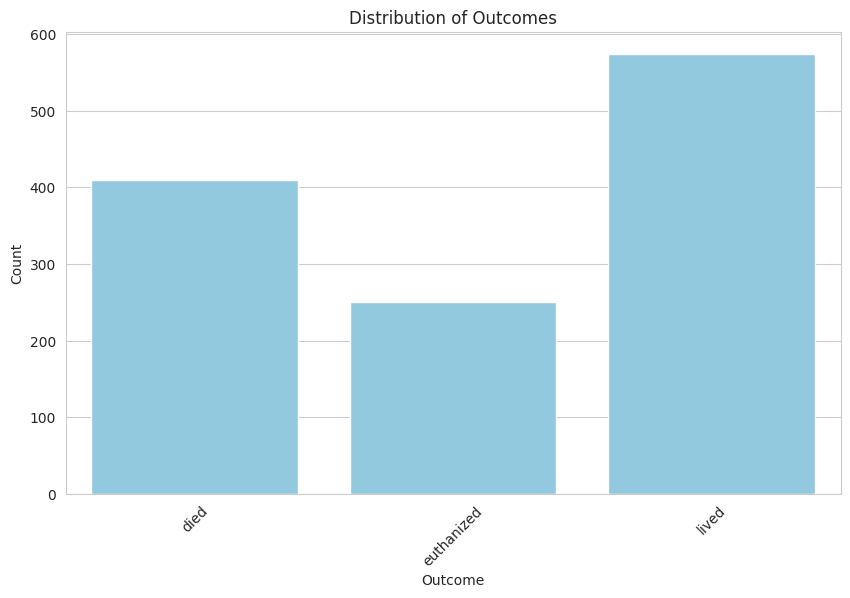

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x = 'outcome', data = train,color='skyblue')
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

train['outcome'] = train['outcome'].replace({'died': 0, 'euthanized': 1, 'lived': 2})

#แบ่งข้อมูล feature ,label
X = train.drop(columns = ['outcome','id'])
Y = train['outcome']

print(train.shape)
print(X.dtypes)

(1235, 29)
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object


In [ ]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
X_numerical = train[numerical_features]
X_categorical = train[categorical_features]

# numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)
X_NN = np.concatenate((X_numerical_scaled, X_categorical_encoded), axis=1)

X_train_N, X_test_N, Y_train_N, Y_test_N = train_test_split(X_NN, Y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Binary columns - Label Encoding
label_encoder = LabelEncoder()
X['age'] = label_encoder.fit_transform(X['age'])
X['surgery'] = label_encoder.fit_transform(X['surgery'])
X['surgical_lesion'] = label_encoder.fit_transform(X['surgical_lesion'])
X['cp_data'] = label_encoder.fit_transform(X['cp_data'])

#Multiple categories columns - ใช้ One-Hot Encoding บนคอลัมน์ที่มีประเภทข้อมูลเป็น object
X = pd.get_dummies(data = X, columns=['temp_of_extremities', 'peripheral_pulse','mucous_membrane','capillary_refill_time',
                                                  'pain','peristalsis','abdominal_distention','nasogastric_tube','nasogastric_reflux',
                                                  'rectal_exam_feces','abdomen','abdomo_appearance'])

X

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,...,abdomen_None,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,1,0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,...,0,0,1,0,0,0,0,0,0,1
1,1,0,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,...,0,1,0,0,0,0,0,0,0,1
3,1,0,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,...,0,0,1,0,0,0,0,0,1,0
4,0,0,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,0,535246,38.5,129.0,48.0,2.0,57.0,66.0,2.0,...,0,1,0,0,0,0,0,0,0,1
1231,1,0,528570,37.5,60.0,50.0,3.0,35.0,6.4,3.6,...,0,0,1,0,0,0,0,0,0,1
1232,1,1,529685,37.5,84.0,40.0,3.0,40.0,5.9,7.0,...,0,0,0,1,0,0,0,0,1,0
1233,1,0,534784,38.1,70.0,16.0,2.0,58.0,74.0,2.0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
data_test = test.drop(columns = 'id')
test_id = test['id']

print(test.shape)
print(data_test.dtypes)

(824, 28)
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object


In [ ]:
# Binary columns - Label Encoding
label_encoder = LabelEncoder()
data_test['age'] = label_encoder.fit_transform(data_test['age'])
data_test['surgery'] = label_encoder.fit_transform(data_test['surgery'])
data_test['surgical_lesion'] = label_encoder.fit_transform(data_test['surgical_lesion'])
data_test['cp_data'] = label_encoder.fit_transform(data_test['cp_data'])

#Multiple categories columns - ใช้ One-Hot Encoding บนคอลัมน์ที่มีประเภทข้อมูลเป็น object
data_test = pd.get_dummies(data = data_test, columns=['temp_of_extremities', 'peripheral_pulse','mucous_membrane','capillary_refill_time',
                                                  'pain','peristalsis','abdominal_distention','nasogastric_tube','nasogastric_reflux',
                                                  'rectal_exam_feces','abdomen','abdomo_appearance'])
data_test

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,...,abdomen_None,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,0,0,534053,38.6,40.0,20.0,7.0,42.0,7.5,2.3,...,0,0,1,0,0,0,0,1,0,0
1,1,0,528469,38.2,112.0,48.0,3.5,44.0,6.0,2.6,...,0,0,1,0,0,0,0,0,0,1
2,1,0,528178,37.7,66.0,12.0,3.0,31.5,6.0,1.6,...,0,0,1,0,0,0,0,0,1,0
3,0,0,534784,37.1,88.0,20.0,2.0,75.0,81.0,1.0,...,0,1,0,0,0,0,1,0,0,0
4,1,0,529840,38.3,50.0,12.0,3.0,37.0,6.8,2.6,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0,0,529461,40.3,114.0,36.0,7.0,57.0,8.1,4.5,...,0,1,0,0,0,0,0,0,0,1
820,1,0,535338,37.2,100.0,20.0,2.0,50.0,66.0,2.0,...,0,0,1,0,0,0,0,0,0,1
821,1,0,529640,39.2,132.0,12.0,6.5,53.0,7.6,4.5,...,1,0,0,0,0,0,0,0,0,1
822,0,0,5287179,38.3,54.0,66.0,7.0,49.0,8.6,5.0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
# หา columns ที่ขาดหายใน X_test
missing_features = set(X_train.columns) - set(data_test.columns)
missing_features

{'nasogastric_reflux_slight',
 'pain_slight',
 'peristalsis_distend_small',
 'rectal_exam_feces_serosanguious'}

In [ ]:
#Adding into test set to match train set
data_test['nasogastric_reflux_slight'] = 0
data_test['pain_slight'] = 0
data_test['peristalsis_distend_small'] = 0
data_test['rectal_exam_feces_serosanguious'] = 0

In [ ]:
#ปรับการเรียงลำดับของข้อมูล test และ train
data_test = data_test.reindex(X_train.columns, axis=1)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [ ]:
#find best parameter for randomforest model
skf = KFold(n_splits = 5)
orig_rdf = RandomForestClassifier(random_state = 20)

rdf_random_params = {'n_estimators': np.arange(50, 250, 50),
                    'max_depth': np.arange(2, 10, 2),
                    'min_samples_split': np.arange(2, 6, 1),
                    'min_samples_leaf': np.arange(1, 3, 1)}

rdf_random_search = RandomizedSearchCV(orig_rdf,
                                      param_distributions = rdf_random_params,
                                      n_iter = 50,
                                      cv = skf,
                                      random_state = 20,
                                      verbose = 1)
print(rdf_random_search)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=20), n_iter=50,
                   param_distributions={'max_depth': array([2, 4, 6, 8]),
                                        'min_samples_leaf': array([1, 2]),
                                        'min_samples_split': array([2, 3, 4, 5]),
                                        'n_estimators': array([ 50, 100, 150, 200])},
                   random_state=20, verbose=1)


In [ ]:
rdf_model = RandomForestClassifier(n_estimators = 200,max_depth = 8,min_samples_split = 2,min_samples_leaf = 1)
rdf_model.fit(X_train, Y_train)
Y_pred1 = rdf_model.predict(X_test)
Y_pred1

array([2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1,
       0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2,
       1, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1,
       1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1,
       2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 1])

In [ ]:
print(classification_report(Y_pred1,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70        94
           1       0.61      0.77      0.68        43
           2       0.74      0.81      0.77       110

    accuracy                           0.73       247
   macro avg       0.72      0.73      0.72       247
weighted avg       0.74      0.73      0.73       247



In [ ]:
#find best parameter for xgboost model
orig_xgb = XGBClassifier(random_state = 20)

xgb_random_params = {'n_estimators': np.arange(50, 250, 50),
                    'max_depth': np.arange(2, 10, 2),
                    'max_leaves': np.arange(0, 100, 5)}

xgb_random_search = RandomizedSearchCV(orig_xgb,
                                      param_distributions = xgb_random_params,
                                      n_iter = 50,
                                      cv = skf,
                                      random_state = 20)
print(xgb_random_search)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
           

In [ ]:
xgb_model = XGBClassifier(max_depth = 8,max_leaves = 5,n_estimators = 200)
xgb_model.fit(X_train,Y_train)
Y_pred2 = xgb_model.predict(X_test)
Y_pred2

array([1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1,
       2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 1, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 1])

In [ ]:
print(classification_report(Y_pred2,Y_test))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        81
           1       0.78      0.82      0.80        51
           2       0.78      0.82      0.80       115

    accuracy                           0.76       247
   macro avg       0.76      0.76      0.76       247
weighted avg       0.76      0.76      0.76       247



In [ ]:
#find best parameter for LGBMClassifier model
orig_rlgbm = LGBMClassifier(random_state = 20)

rlgbm_random_params = {'num_leaves': np.arange(4, 36, 8),
                     'learning_rate': np.arange(0.1, 0.9, 0.2),
                     'n_estimators': np.arange(50, 200, 50)}

rlgbm_random_search = RandomizedSearchCV(orig_rlgbm,
                                      param_distributions = rlgbm_random_params,
                                      n_iter = 50,
                                      cv = skf,
                                      random_state = 20,
                                      verbose = 1)
print(rlgbm_random_search)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LGBMClassifier(random_state=20), n_iter=50,
                   param_distributions={'learning_rate': array([0.1, 0.3, 0.5, 0.7]),
                                        'n_estimators': array([ 50, 100, 150]),
                                        'num_leaves': array([ 4, 12, 20, 28])},
                   random_state=20, verbose=1)


In [ ]:
rlgbm_model = LGBMClassifier(n_estimators = 200,learning_rate = 0.1,num_leaves = 4,class_weight = 'balanced',force_col_wise = True)
rlgbm_model.fit(X_train,Y_train)
Y_pred3 = rlgbm_model.predict(X_test)
Y_pred3

[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 65
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


array([1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1,
       2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1,
       2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2,
       0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0,
       0, 1, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 1])

In [ ]:
print(classification_report(Y_pred3,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        87
           1       0.76      0.68      0.72        60
           2       0.70      0.85      0.77       100

    accuracy                           0.73       247
   macro avg       0.74      0.72      0.72       247
weighted avg       0.73      0.73      0.73       247



In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(random_state = 20,
                                  boosting_type = 'Ordered',
                                  verbose = 0)

catboost_model.fit(X_train, Y_train)

In [ ]:
Y_pred4 = catboost_model.predict(X_test)
Y_pred4

array([[1],
       [1],
       [2],
       [1],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
    

In [ ]:
print(classification_report(Y_pred4,Y_test))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        79
           1       0.72      0.81      0.76        48
           2       0.77      0.78      0.77       120

    accuracy                           0.74       247
   macro avg       0.73      0.74      0.73       247
weighted avg       0.74      0.74      0.74       247



In [ ]:
num_classes = 3

model = keras.Sequential([
    keras.layers.Input(shape=(X_train_N.shape[1],)),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.005))
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_N, Y_train_N,
    epochs=30,
    validation_data=(X_test_N, Y_test_N),
    verbose=2
)

Epoch 1/30
31/31 - 3s - loss: 1.5157 - accuracy: 0.4028 - val_loss: 1.3344 - val_accuracy: 0.6194 - 3s/epoch - 84ms/step
Epoch 2/30
31/31 - 0s - loss: 1.3417 - accuracy: 0.5334 - val_loss: 1.2407 - val_accuracy: 0.6518 - 130ms/epoch - 4ms/step
Epoch 3/30
31/31 - 0s - loss: 1.2701 - accuracy: 0.5749 - val_loss: 1.1555 - val_accuracy: 0.7004 - 139ms/epoch - 4ms/step
Epoch 4/30
31/31 - 0s - loss: 1.2114 - accuracy: 0.6306 - val_loss: 1.0956 - val_accuracy: 0.7045 - 122ms/epoch - 4ms/step
Epoch 5/30
31/31 - 0s - loss: 1.1351 - accuracy: 0.6478 - val_loss: 1.0586 - val_accuracy: 0.7004 - 135ms/epoch - 4ms/step
Epoch 6/30
31/31 - 0s - loss: 1.1516 - accuracy: 0.6488 - val_loss: 1.0428 - val_accuracy: 0.6923 - 135ms/epoch - 4ms/step
Epoch 7/30
31/31 - 0s - loss: 1.1010 - accuracy: 0.6447 - val_loss: 1.0331 - val_accuracy: 0.6923 - 189ms/epoch - 6ms/step
Epoch 8/30
31/31 - 0s - loss: 1.0671 - accuracy: 0.6731 - val_loss: 1.0204 - val_accuracy: 0.7004 - 138ms/epoch - 4ms/step
Epoch 9/30
31/31 -

In [ ]:
Y_prednn = model.predict(X_test_N)
Y_predN = np.argmax(Y_prednn, axis=1)
Y_predN

8/8 [==============================] - 1s 9ms/step


array([2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1,
       0, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1,
       2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2,
       2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 1])

In [ ]:
print(classification_report(Y_predN,Y_test_N))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66        85
           1       0.57      0.72      0.64        43
           2       0.73      0.74      0.73       119

    accuracy                           0.69       247
   macro avg       0.67      0.69      0.68       247
weighted avg       0.70      0.69      0.69       247



In [ ]:
from sklearn.metrics import f1_score

rdf_score = f1_score(Y_test, Y_pred1, average = 'micro')
print('Random forest model = ',rdf_score)

xgb_score = f1_score(Y_test, Y_pred2, average = 'micro')
print('Xgboost model = ',xgb_score)

rlgbm_score = f1_score(Y_test, Y_pred3, average = 'micro')
print('LGBMClassifier model = ',rlgbm_score)

cb_score = f1_score(Y_test, Y_pred4, average = 'micro')
print('Catboost model = ',cb_score)

nn_score = f1_score(Y_test_N, Y_predN, average = 'micro')
print('NN model = ',nn_score)

Random forest model =  0.728744939271255
Xgboost model =  0.7611336032388665
LGBMClassifier model =  0.728744939271255
Catboost model =  0.7368421052631579
NN model =  0.6923076923076923


In [ ]:
Predict = xgb_model.predict(data_test)
y_predict = pd.Series(Predict)
y_predict = y_predict.map({0:'died',1:'euthanized',2:'lived'})
y_predict = y_predict.to_list()
y_predict

['lived',
 'lived',
 'lived',
 'euthanized',
 'lived',
 'died',
 'died',
 'died',
 'lived',
 'lived',
 'died',
 'lived',
 'euthanized',
 'died',
 'died',
 'lived',
 'lived',
 'died',
 'died',
 'died',
 'died',
 'died',
 'died',
 'died',
 'died',
 'lived',
 'died',
 'euthanized',
 'lived',
 'died',
 'lived',
 'died',
 'died',
 'died',
 'lived',
 'died',
 'lived',
 'lived',
 'died',
 'euthanized',
 'died',
 'euthanized',
 'died',
 'euthanized',
 'lived',
 'lived',
 'died',
 'lived',
 'lived',
 'died',
 'died',
 'lived',
 'died',
 'died',
 'died',
 'lived',
 'died',
 'died',
 'died',
 'died',
 'died',
 'euthanized',
 'died',
 'died',
 'died',
 'lived',
 'euthanized',
 'died',
 'lived',
 'lived',
 'died',
 'died',
 'lived',
 'lived',
 'euthanized',
 'died',
 'euthanized',
 'died',
 'died',
 'euthanized',
 'died',
 'euthanized',
 'lived',
 'euthanized',
 'lived',
 'lived',
 'lived',
 'lived',
 'lived',
 'lived',
 'euthanized',
 'lived',
 'died',
 'euthanized',
 'lived',
 'euthanized',
 'die

In [ ]:
test_id

0      1235
1      1236
2      1237
3      1238
4      1239
       ... 
819    2054
820    2055
821    2056
822    2057
823    2058
Name: id, Length: 824, dtype: int64

In [ ]:
submission = pd.DataFrame({"id":test_id, "outcome":y_predict})
submission.to_csv('submission.csv', index=False)
pd.read_csv('submission.csv')

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived
3,1238,euthanized
4,1239,lived
...,...,...
819,2054,died
820,2055,euthanized
821,2056,died
822,2057,lived


In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 2.291s


In [ ]:
%%writefile app.py
import streamlit as st
st.write('# test')

Writing app.py


In [ ]:
!streamlit run /content/app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.57.147:8501

npx: installed 22 in 2.262s
your url is: https://fancy-guests-join.loca.lt
  Stopping...
^C


In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

_left, mid, _right = st.columns(3)
with mid:
  st.image('hourse.png',width = 200)

st.header('''Health Outcome of Horses Prediction app''')
st.sidebar.header('User Input Parameters')

def user_input_features():
    surgery = st.sidebar.radio("Surgery",["Yes","No"],index=None,key='surgery_radio')
    age = st.sidebar.radio("Age", ["young", "adult"], index=None, key="age_radio")
    hospital_number = st.sidebar.slider('Hospital Number', 521399, 5305129, 2879337, key="hospital_number_slider")
    rectal_temp = st.sidebar.slider('Rectal_temp', 36.0, 40.0, 38.0, key="rectal_temp_slider")
    pulse = st.sidebar.slider('Pulse', 36.0, 184.0, 108.0, key="pulse_slider")
    respiratory_rate = st.sidebar.slider('Respiratory Rate', 0.0, 100.0, 50.0, key="respiratory_rate_slider")
    temp_of_extremities = st.sidebar.selectbox("Temperature of extremities",["normal","cool","cold","warm","none"], key="temp_of_extremities_select")
    peripheral_pulse = st.sidebar.selectbox("Peripheral pulse",["normal","reduced","absent","increased","none"], key="peripheral_pulse_select")
    mucous_membrane = st.sidebar.selectbox("Mucous Membrane",["normal_pink","bright_pink","Bright_Red","pale_cyanotic","dark_cyanotic","pale_pink","None"], key="mucous_membrane_select")
    capillary_refill_time = st.sidebar.radio("Capillary refill time",["less_3_sec","3","more_3_sec"],index=None,key="capillary_refill_time_radio")
    pain = st.sidebar.selectbox("Pain",["mild_pain","depressed","severe_pain","extreme_pain","moderate","alert","None"], key="pain_select")
    peristalsis = st.sidebar.selectbox("Peristalsis",["hypomotile","hypermotile","absent","normal","none"], key="peristalsis_select")
    abdominal_distention = st.sidebar.selectbox("Abdominal Distention",["slight","moderate","severe","none"], key="abdominal_distention_select")
    nasogastric_tube = st.sidebar.selectbox("Nasogastric tube",["slight","significant","none"], key="nasogastric_tube_select")
    nasogastric_reflux = st.sidebar.radio("Nasogastric reflux",["less_1_liter","slight","more_1_liter"],index=None,key="nasogastric_reflux_radio")
    nasogastric_reflux_ph = st.sidebar.slider('Nasogastric reflux ph', 0.0, 10.0, 5.0, key="nasogastric_reflux_ph_slider")
    rectal_exam_feces = st.sidebar.selectbox("Rectal_exam_feces",["normal","decreased","absent","increased","none"], key="rectal_exam_feces_select")
    abdomen = st.sidebar.selectbox("Abdomen",["distend_small","distend_large","other","firm","normal","none"], key="abdomen_select")
    packed_cell_volume = st.sidebar.slider("Packed cell volume",0.0,100.0, 50.0, key="packed_cell_volume_slider")
    total_protein = st.sidebar.slider("Total protein",0.0,100.0, 50.0, key="total_protein_slider")
    abdomo_appearance = st.sidebar.selectbox("Abdomo appearance ",["clear","cloudy","serosanguious","none"], key="abdomo_appearance_select")
    abdomo_protein = st.sidebar.slider("Abdomo protein",0.0,20.0, 10.0, key="abdomo_protein_slider")
    surgical_lesion = st.sidebar.radio("Surgical lesion",["Yes","No"],index=None,key="surgical_lesion_radio")
    lesion_1 = st.sidebar.slider("lesion 1",0.0,10000.0, 5000.0, key="lesion_1_slider")
    lesion_2 = st.sidebar.slider("lesion 2",0.0,10000.0, 5000.0, key="lesion_2_slider")
    lesion_3 = st.sidebar.slider("lesion 3",0.0,10000.0, 5000.0, key="lesion_3_slider")
    cp_data = st.sidebar.radio("cp_data",["Yes","No"],index=None,key='cp_data')

    user_input_data = {'surgery': surgery,
               'age': age,
               'hospital_number': hospital_number,
               'rectal_temp': rectal_temp,
               'pulse':pulse,
               'respiratory_rate':respiratory_rate,
               'temp_of_extremities':temp_of_extremities,
               'peripheral_pulse':peripheral_pulse,
               'mucous_membrane':mucous_membrane,
               'capillary_refill_time':capillary_refill_time,
               'pain':pain,
               'peristalsis':peristalsis,
               'abdominal_distention':abdominal_distention,
               'nasogastric_tube':nasogastric_tube,
               'nasogastric_reflux':nasogastric_reflux,
               'nasogastric_reflux_ph':nasogastric_reflux_ph,
               'rectal_exam_feces':rectal_exam_feces,
               'abdomen':abdomen,
               'packed_cell_volume':packed_cell_volume,
               'total_protein':total_protein,
               'abdomo_appearance':abdomo_appearance,
               'abdomo_protein':abdomo_protein,
               'surgical_lesion':surgical_lesion,
               'lesion_1':lesion_1,
               'lesion_2':lesion_2,
               'lesion_3':lesion_3,
               'cp_data':cp_data}

    features = pd.DataFrame(user_input_data, index=[0])
    return features

df = user_input_features()
labels = ['died', 'euthanized' , 'lived']

st.subheader('User Input Parameters')
st.write(df)

with open('model.pkl', 'rb') as file:
   xgboots_model = pickle.load(file)

# Binary columns - Label Encoding
data_input = df.copy()
label_encoder = LabelEncoder()
data_input['age'] = data_input['age'].apply(lambda x: 1 if x == 'adult' else 0)
data_input['surgery'] = data_input['surgery'].apply(lambda x: 1 if x == 'Yes' else 0)
data_input['surgical_lesion'] = data_input['surgical_lesion'].apply(lambda x: 1 if x == 'Yes' else 0)
data_input['cp_data'] = data_input['cp_data'].apply(lambda x: 1 if x == 'Yes' else 0)


#Multiple categories columns - ใช้ One-Hot Encoding บนคอลัมน์ที่มีประเภทข้อมูลเป็น object
# ใช้ One-Hot Encoding และระบุคอลัมน์ที่ต้องการแปลง
data_input = pd.get_dummies(data=data_input, columns=['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time',
                                                      'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
                                                      'rectal_exam_feces', 'abdomen', 'abdomo_appearance'])


trained_features = xgboots_model.get_booster().feature_names
missing_features = set(trained_features) - set(data_input.columns)

for feature in missing_features:
    data_input[feature] = 0

data_input = data_input.reindex(columns=trained_features)

st.subheader('Data preparation')
st.write(data_input)

st.subheader('Class labels and their corresponding index number')
st.write(labels)


prediction = xgboots_model.predict(data_input)
st.subheader('Prediction')
st.write(labels[prediction[0]])


Overwriting app.py


In [ ]:
!streamlit run /content/app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.57.147:8501

npx: installed 22 in 2.068s
your url is: https://four-hats-wish.loca.lt
